<a href="https://colab.research.google.com/github/Olaoluwakiitan-Olabiyi/PortfolioProject/blob/main/DSN_Pre_Bootcamp_Final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lightgbm==3.2.1

     |████████████████████████████████| 2.0 MB 5.1 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 21 kB/s 


# Problem Statement
Sapa.com is one of the leading eCommerce platforms in Nigeria with millions of daily complete transactions. The goods and services on sapa.com cater for both the elite and the masses which makes it the first choice for almost everybody in Nigeria. Due to the COVID-19 pandemic that struck the entire world in all areas of living, the companies' daily complete transactions have dropped drastically to thousands.

The CEO, Mr Echoke in his recent actions to put the platform back to the top of the eCommerce platforms chain in the country has approved the use of Artificial intelligence in User Personality Analysis. The company has contracted your team consisting of AI professionals with a special focus on recommender system development to build a robust intelligent model capable of recommending products and services to Users based on their activities on sapa.com.

Your team lead has assigned you to the building of a model capable of predicting users’ responses to marketing campaigns based on the features in the provided dataset by the sapa.com data engineer. The next phase of the project is highly dependent on the accuracy of your model as this is the foundation of what will constitute the features of the proposed recommender system development. Good luck!



## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
pd.set_option ('max_columns', None)
pd.set_option ('max_rows', 100)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

from datetime import datetime
from dateutil.parser import parse

# when using Scikit-Learn's Imputer class
from sklearn.impute import SimpleImputer
from sklearn import preprocessing


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample
from sklearn.pipeline import Pipeline

from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import Ridge ,LinearRegression
import imblearn
from tqdm import tqdm_notebook
from sklearn.model_selection import KFold,StratifiedKFold ,GroupKFold, cross_val_score
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, classification_report, recall_score, precision_recall_fscore_support, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

#Plots

import seaborn as sns
sns.set_context ('paper')     # set the scale
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')





## Load Datasets

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submission_file = pd.read_csv('SampleSubmission.csv')

In [ ]:
train.head(3)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1


In [ ]:
test.head(3)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0


In [ ]:
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [ ]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Target Column

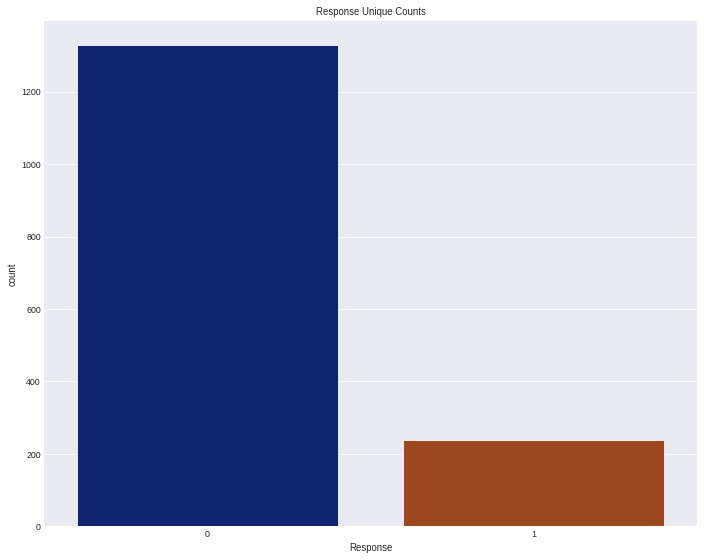

In [ ]:
plt.figure (figsize= (10,8), tight_layout= True)
plt.title ('Response Unique Counts')
plt.rc('grid', c ='r', ls ='-', lw = 0.5)  # gridstyle
plt.rc('axes', titlesize=18)               # axes title fontsize
plt.rc('axes', labelsize=14)               # x and y labels fontsize
plt.rc('xtick', labelsize=14)              # fontsize of the tick labels
plt.rc('ytick', labelsize=14)              # fontsize of the tick labels
plt.rc('legend', fontsize=14)              # legend fontsize
plt.rc('font', size=14)                    # modify text sizes
sns.countplot(train['Response'], label = 'counts', palette= 'dark' )
plt.show()


## Checking Feature Correlation

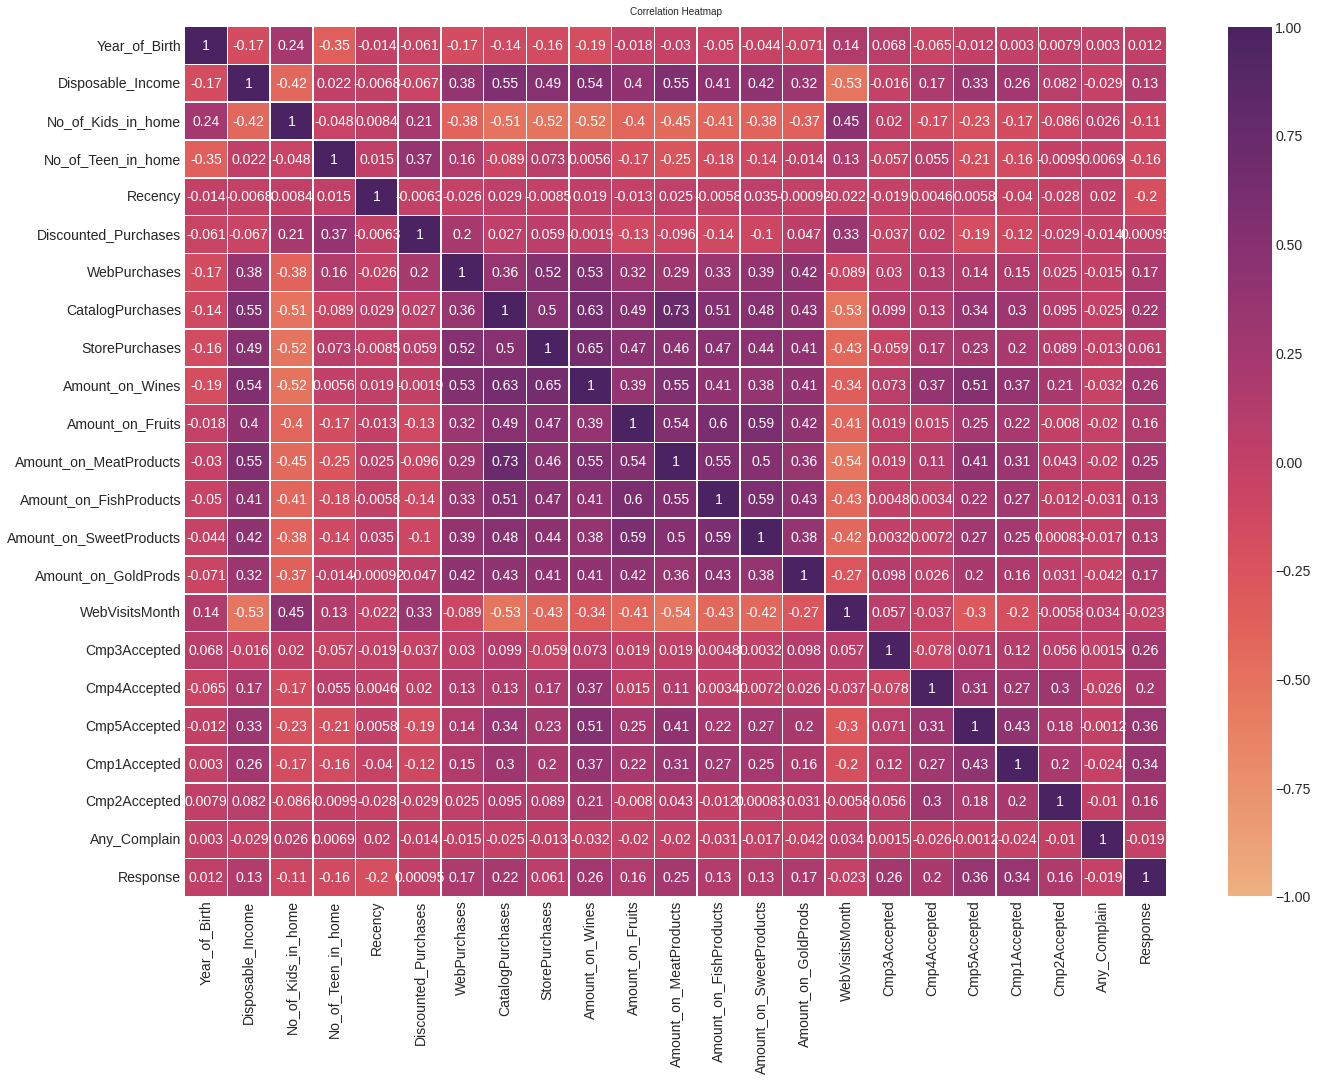

In [ ]:
plt.figure(figsize=(22, 16))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, linewidth= 0.5, cmap= 'flare') ### checking the correlation between the features
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);
plt.show()

# Data Cleaning

In [ ]:
train.isna().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

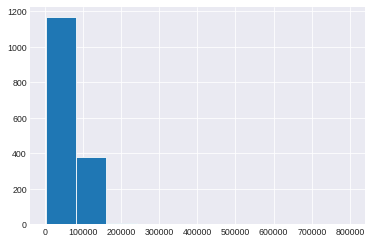

In [ ]:
# median income looks like an imp feature

train['Disposable_Income'].hist()

In [ ]:
past_yr= train[train['Year_of_Birth']<1940].index
train.drop(past_yr, axis=0, inplace=True)
train.reset_index(drop=True, inplace=True)

In [ ]:
len_train = len(train)
df = pd.concat([train, test]).reset_index(drop=True)

In [ ]:
df['Disposable_Income'] = df['Disposable_Income'].fillna(train['Disposable_Income'].median())

## Dealing with DATETIME

In [ ]:
df['Date_Customer'] = pd.to_datetime(df['Date_Customer'])

df['enrollment_year'] = df['Date_Customer'].dt.year
df['enrollment_month'] = df['Date_Customer'].dt.month
df['enrollment_day'] = df['Date_Customer'].dt.day

In [ ]:
df.head(3)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,enrollment_year,enrollment_month,enrollment_day
0,ID_4A9AR6FQ,1955,2,2,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0.0,2014,6,22
1,ID_X28T3VEK,1958,2,5,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0.0,2013,1,8
2,ID_AWXARH57,1962,2,4,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1.0,2013,11,21


## ENCODING THE CATEGORICAL COLUMN

In [ ]:
categorical_col = ['Education_Level','Marital_Status']

for i in categorical_col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

## Set X and y


In [ ]:
train = df[:len_train]
test = df[len_train:]

In [ ]:
X = train.drop(columns=['ID','Date_Customer','Response'])
y = train['Response']
test2 = test.drop(columns=['ID','Date_Customer','Response'])

In [ ]:
y.value_counts()

0.0    1328
1.0     239
Name: Response, dtype: int64

## Normalization

In [ ]:
#instantitiate standard scaler.

scaler = StandardScaler()
X= scaler.fit_transform(X)

In [ ]:
test2 = scaler.fit_transform(test2)

## Split into train and test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## BASELINE MODEL

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
f1_score(y_test, lr_pred, average= 'micro')

0.8853503184713376

In [ ]:
submission= submission_file.copy()

In [ ]:
submission_file.Response = lr.predict(test2)

In [ ]:
submission_file.to_csv('aSubmission.csv', index= False)

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier (criterion = 'entropy', random_state= 42)
dc.fit (X_train, y_train)
  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
dc_pred = dc.predict(X_test)

In [ ]:
f1_score(y_test, dc_pred, average= 'micro')

0.8184713375796179

In [ ]:
accuracy_score(y_test, dc_pred)

0.8184713375796179

In [ ]:
submission_file.Response = dc.predict(test2)

In [ ]:
submission_file.to_csv('b_Submission.csv', index= False)

## CATBOOST

In [ ]:
%%capture
!pip install catboost

In [ ]:
import lightgbm as lgb #install this library using pip install lgbm if you don't have it 
from catboost import CatBoostClassifier #Install this Library using pip install catboost, before importing if you don't have it 

In [ ]:
#Creating model 
cat_model=CatBoostClassifier()

#Training Catboost Model on train set
cat_model.fit(X_train,y_train)

#Predictiing on Test Set
y_pred_cat=cat_model.predict(X_test)

#Evaluating model using f1_score
print("Catboost F1 score on validation set is : ",f1_score(y_test,y_pred_cat))

Learning rate set to 0.011344
0:	learn: 0.6844833	total: 50.5ms	remaining: 50.5s
1:	learn: 0.6754987	total: 53.1ms	remaining: 26.5s
2:	learn: 0.6661370	total: 55.4ms	remaining: 18.4s
3:	learn: 0.6559755	total: 57.8ms	remaining: 14.4s
4:	learn: 0.6472463	total: 60.1ms	remaining: 12s
5:	learn: 0.6400491	total: 62.6ms	remaining: 10.4s
6:	learn: 0.6329147	total: 64.9ms	remaining: 9.21s
7:	learn: 0.6244176	total: 67.3ms	remaining: 8.35s
8:	learn: 0.6165950	total: 69.8ms	remaining: 7.68s
9:	learn: 0.6086037	total: 72.2ms	remaining: 7.15s
10:	learn: 0.6016568	total: 74.6ms	remaining: 6.7s
11:	learn: 0.5934834	total: 76.9ms	remaining: 6.33s
12:	learn: 0.5868059	total: 79.4ms	remaining: 6.03s
13:	learn: 0.5806158	total: 82ms	remaining: 5.77s
14:	learn: 0.5732766	total: 84.6ms	remaining: 5.55s
15:	learn: 0.5667372	total: 87.3ms	remaining: 5.37s
16:	learn: 0.5602580	total: 89.8ms	remaining: 5.19s
17:	learn: 0.5530228	total: 92.3ms	remaining: 5.03s
18:	learn: 0.5467697	total: 94.9ms	remaining: 4.9

In [ ]:
#Now Predict on Test set
cat_preds = cat_model.predict(test2)

In [ ]:
submission_file.Response = cat_model.predict(test2)

In [ ]:
submission_file.to_csv('c_Submission.csv', index= False)

## NaiveModel

In [ ]:
from sklearn.naive_bayes import GaussianNB
naivemodel= GaussianNB()
naivemodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
naivemodel_prediction = naivemodel.predict(X_test)

In [ ]:
f1_score(y_test, naivemodel_prediction, average= 'micro')

0.5031847133757962

In [ ]:
accuracy_score(y_test, naivemodel_prediction)

0.5031847133757962

In [ ]:
submission_file.Response =naivemodel.predict(test2)

In [ ]:
submission_file.to_csv('d_Submission.csv', index= False)

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier(use_label_encoder =False)
xgboost_model = xgboost_model.fit(X_train, y_train)

In [ ]:
xgb_predict= xgboost_model.predict(X_test)

In [ ]:
f1_score(y_test,xgb_predict, average= 'micro')

0.8821656050955414

In [ ]:
submission_file.Response = xgboost_model.predict(test2)

In [ ]:
submission_file.to_csv('g5_Submission.csv', index= False)

## SMOTE Imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
seed = 50
sm = SMOTE(sampling_strategy={1:280, 0:1328}, random_state=seed) 
X_, y_ = sm.fit_resample(X, y)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
folds = KFold(n_splits=5, shuffle=True, random_state=1234)
oofs = np.zeros((len(X_)))
preds = np.zeros((len(test2)))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_, y_)):
    
    X_trn, y_trn = X_[trn_idx], y_[trn_idx]
    X_val, y_val = X_[val_idx], y_[val_idx]
    
    
    clf = LGBMClassifier(learning_rate=0.2, n_estimators=1000, scale_pos_weight=4, max_depth=-1, colsample_bytree=0.7, subsample=0.85, reg_alpha=3, reg_lambda=20)
    clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)],
                    verbose = 0, early_stopping_rounds=200)
    
    vp = clf.predict_proba(X_val)[:,1]
    b = pd.DataFrame(vp)
    b[0] = np.where(b[0]>0.5, 1, 0)
    val_score = f1_score((y_val), (b[0]))
    
    print(f'\nFold {fold_+1} Val score: {val_score}\n')
    
    tp = clf.predict_proba(test2)[:,1]
    
    oofs[val_idx] = vp
    preds += tp/5
    
a = pd.DataFrame(oofs)
a[0] = np.where(a[0]>0.5, 1, 0)
oof_score = f1_score((y_), (a[0]))
print(f'\nOOF F1 score is : {oof_score}')


Fold 1 Val score: 0.7058823529411764


Fold 2 Val score: 0.7079646017699116


Fold 3 Val score: 0.673076923076923


Fold 4 Val score: 0.6605504587155964


Fold 5 Val score: 0.6984126984126984


OOF F1 score is : 0.6900175131348513
CPU times: user 1.81 s, sys: 72.7 ms, total: 1.89 s
Wall time: 1.01 s


In [ ]:
submission_file['Response'] = preds

In [ ]:
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,0.119145
1,ID_WFE91NAA,0.337157
2,ID_JV11RBRK,0.062347
3,ID_6B7SVKY9,0.655202
4,ID_GOVUZ545,0.219507


In [ ]:
submission_file['Response'] = np.where(submission_file['Response']>=0.5, 1, 0)

In [ ]:
submission_file['Response'].value_counts()

0    554
1    118
Name: Response, dtype: int64

In [ ]:
submission_file.to_csv('isub2.csv', index=False)